In [1]:
import mysql.connector as sql
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

db_connection = sql.connect(host='', database='', user='', password='')
db_cursor = db_connection.cursor()

query = 'SELECT * FROM all_physical'
db_cursor.execute(query)
table_rows = db_cursor.fetchall()
df = pd.DataFrame(table_rows)
data = pd.read_sql(query, db_connection)

In [3]:
import datetime as dt
for i in range(0, len(data)):
    data.iloc[i]['Timestamp'] = dt.datetime.strptime(data.iloc[i]['Timestamp'],' %d/%m/%Y %I:%M:%S %p')
    data.iloc[i]['Timestamp'] = data.iloc[i]['Timestamp'].strftime('%Y-%m-%d %H:%M:%S')
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data = data.sort('Timestamp')

/Users/yingwu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [16]:
data.ix[:, 'FIT101':'P603'] = data.ix[:, 'FIT101':'P603'].astype(float)

In [19]:
continuous_features = ['FIT101','AIT202','FIT201',
                       'DPIT301','FIT301','FIT401',
                      'AIT501','AIT504','FIT501','FIT502','FIT503','FIT504',
                      'PIT502','FIT601', 'LIT101','AIT201','AIT203','LIT301','AIT401','AIT402','LIT401',
                      'AIT502','AIT503',
                      'PIT501','PIT503']
data_cor = data[continuous_features].corr()
cor_list = []

for i in range(0,(len(continuous_features)-1)):
    for j in range(i+1,len(continuous_features)):
        cor_list.append(data_cor.iloc[i,j])


In [20]:
cor_list

[-0.10566946999884884,
 0.235111219696157,
 -0.002245983218408383,
 -0.0046923405375074471,
 0.28248663730918139,
 0.20647570916458297,
 -0.043369782546067243,
 0.29015050338458903,
 0.28920988672366887,
 0.2875464840836402,
 0.28135410673666789,
 0.2063506136816233,
 0.061976626843257464,
 -0.63448974094700772,
 0.064848989914649741,
 0.00027161306584042076,
 0.29725714684128646,
 -0.027291819599808146,
 -0.23577496740915874,
 0.43467052536644446,
 -0.15833896556423604,
 0.12346196846231745,
 0.29046399407721862,
 0.29087855189185646,
 -0.28371807125387544,
 -0.15210731617429457,
 -0.16310196520680334,
 -0.1618301798910311,
 -0.45718350030682203,
 0.089912947889429315,
 -0.16290451029948855,
 -0.155619614909903,
 -0.17402798179144532,
 -0.16839659272604873,
 -0.38582442316317267,
 -0.012113762827874417,
 0.21903518858394747,
 -0.77443277372944619,
 -0.13328577113425374,
 0.11378886036507985,
 0.00095853909231736101,
 -0.038293098870493508,
 -0.18061222841684307,
 -0.14462626326947262,

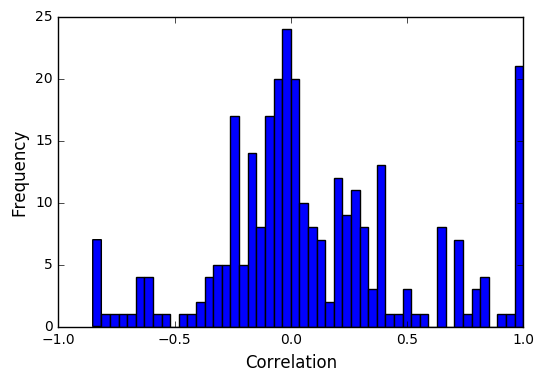

In [21]:
plt.figure(figsize=(6,4))

plt.hist(cor_list, bins=50)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Correlation', fontsize=12)
plt.show()